# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [48]:
#Import your libraries here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
#Load the dataset and explore its variables

df = pd.read_csv('snsdata.csv')
df.head()


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [51]:
df.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [52]:
df['gender'].value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [53]:
df['blonde'].value_counts()

0      28278
1       1250
2        257
4         99
3         75
5         25
6          6
7          3
8          2
10         1
327        1
19         1
16         1
13         1
Name: blonde, dtype: int64

## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [54]:
#Your code here:

df.dropna(inplace = True)
df.shape

(24005, 40)

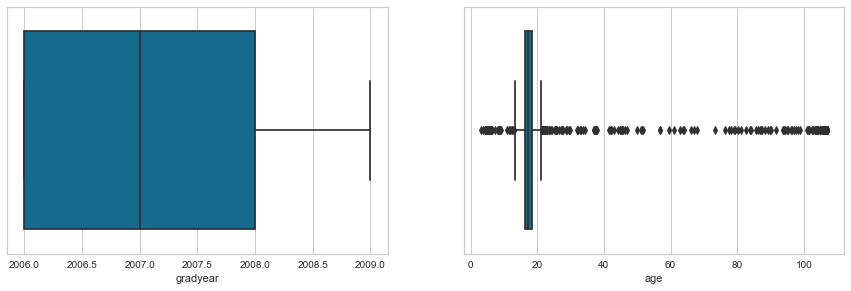

In [55]:
numerical = ['gradyear','age']
fig = plt.figure(figsize=(15,10))
axes=220
for num in numerical:
    axes+=1
    fig.add_subplot(axes)
    sns.boxplot(data=df,x=num)
plt.show()

In [56]:
df = df[(df['age'] >= 13) & (df['age'] <= 19)] 
df.shape

(22173, 40)

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

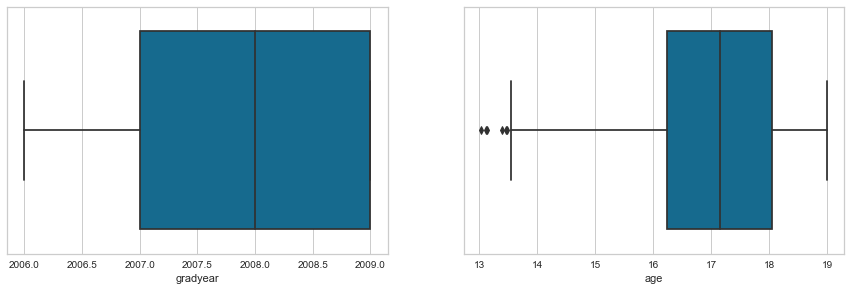

In [57]:
#Your code here:

numerical = ['gradyear','age']
fig = plt.figure(figsize=(15,10))
axes=220
for num in numerical:
    axes+=1
    fig.add_subplot(axes)
    sns.boxplot(data=df,x=num)
plt.show()

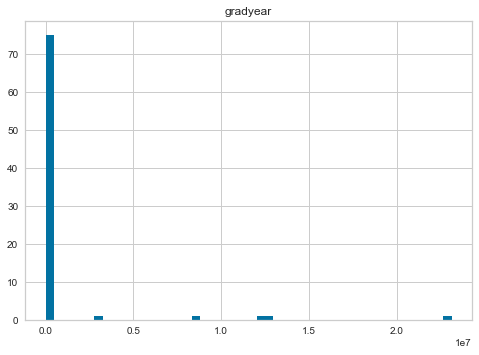

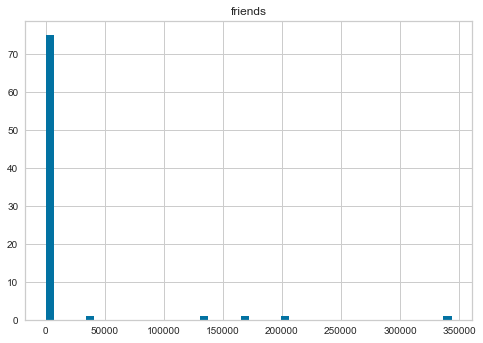

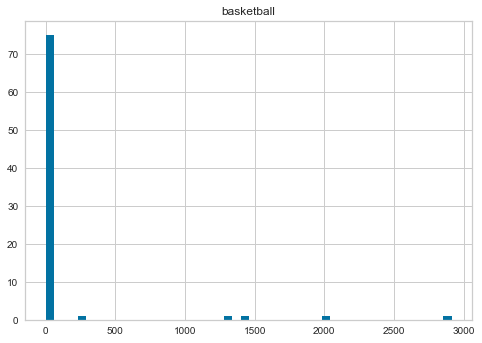

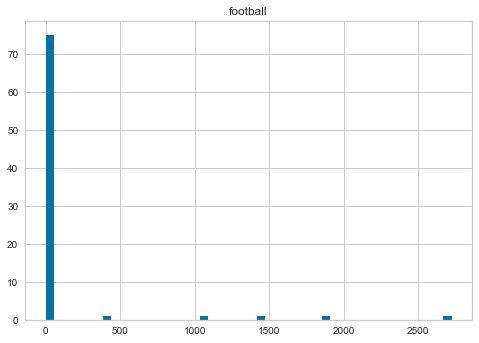

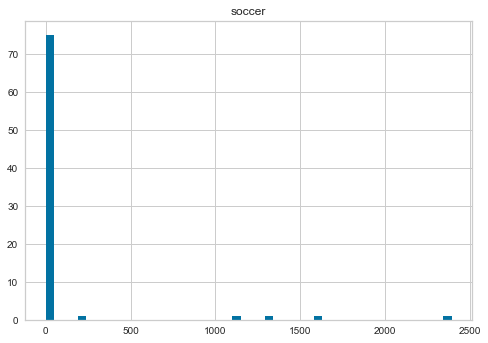

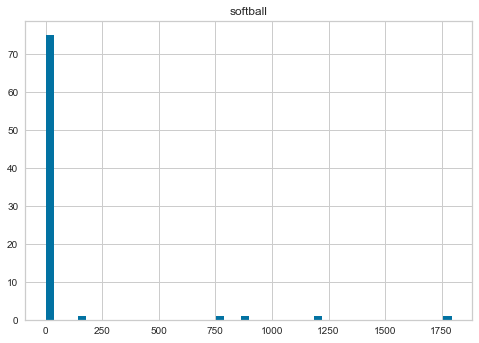

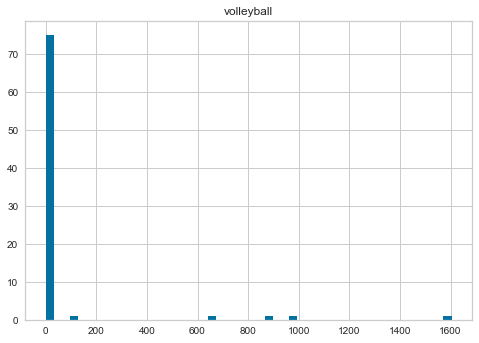

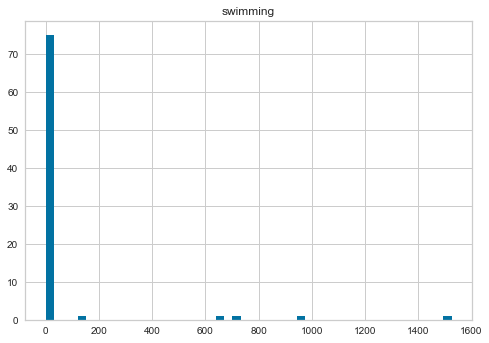

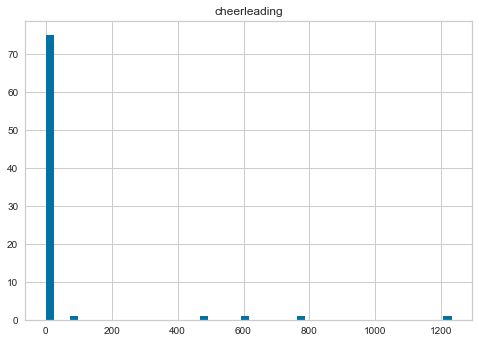

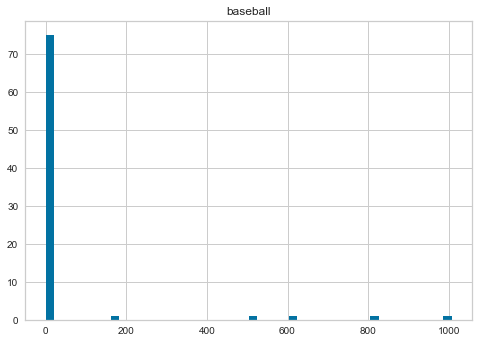

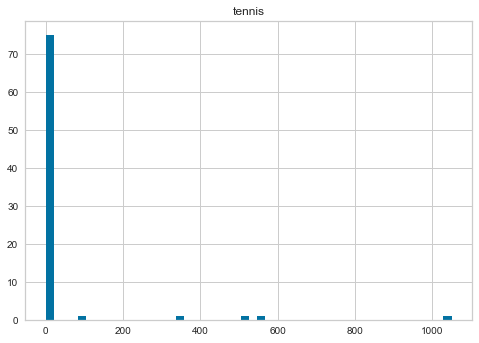

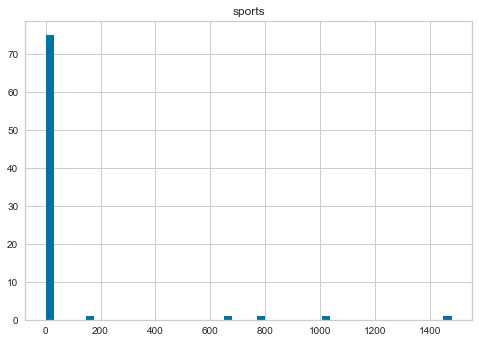

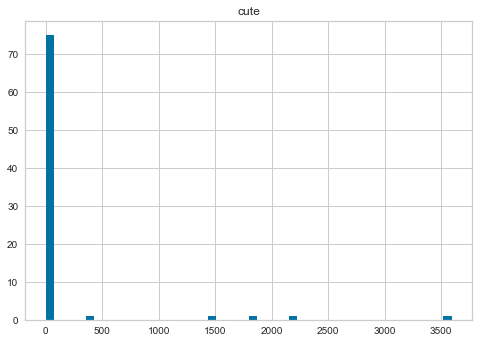

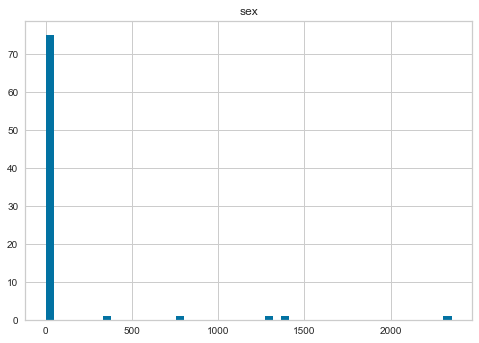

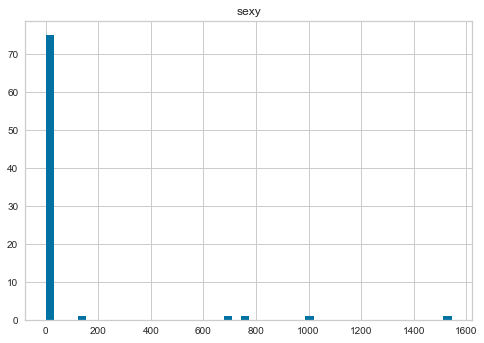

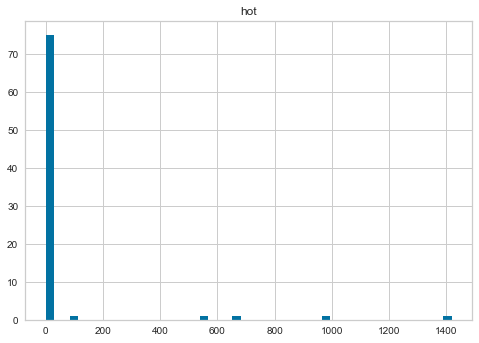

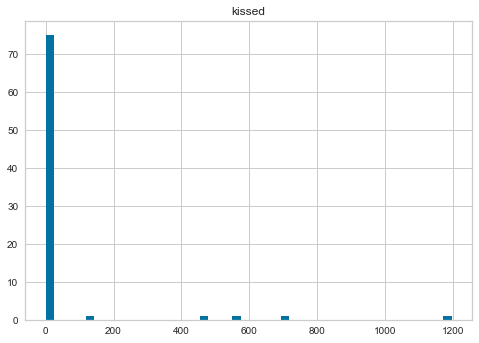

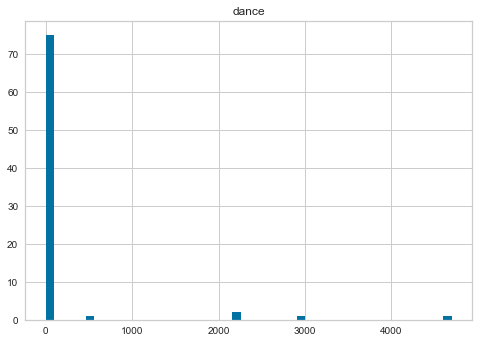

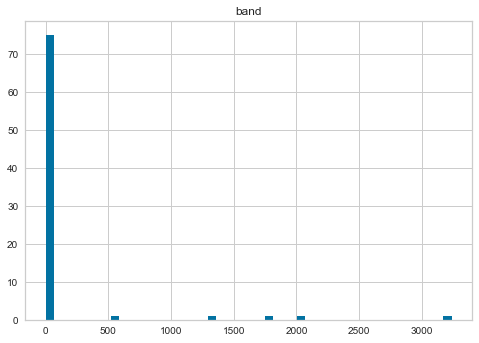

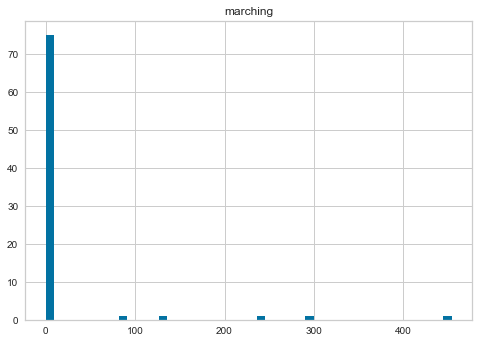

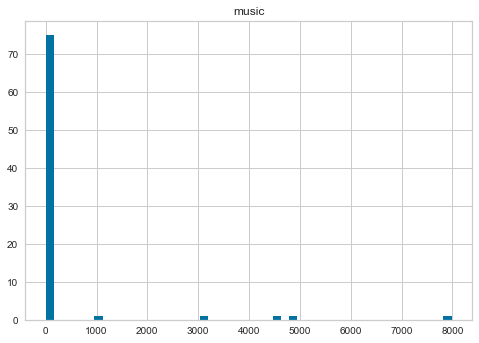

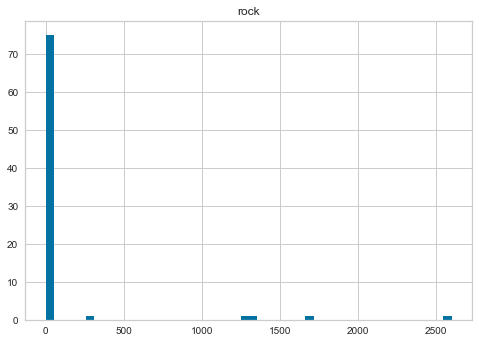

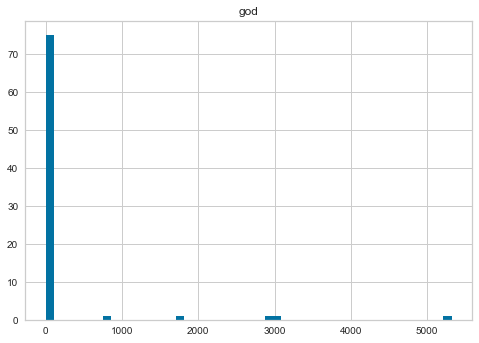

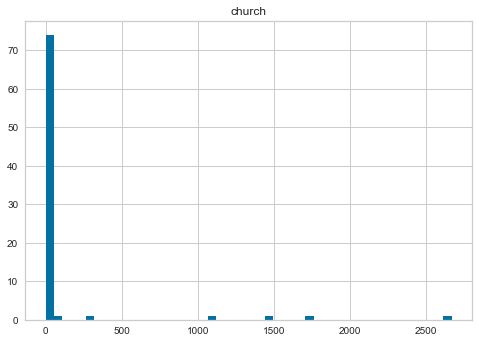

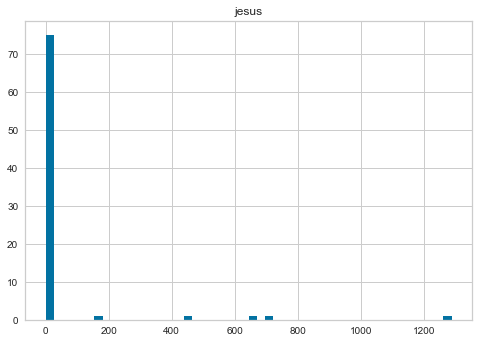

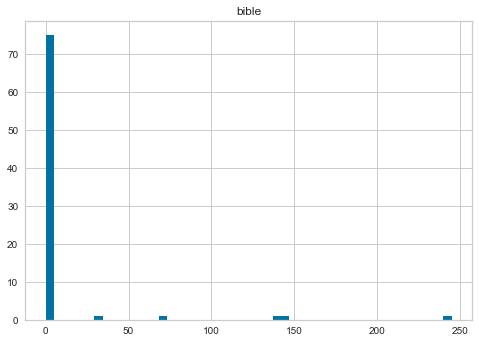

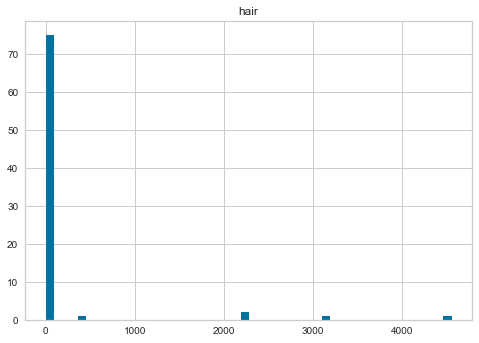

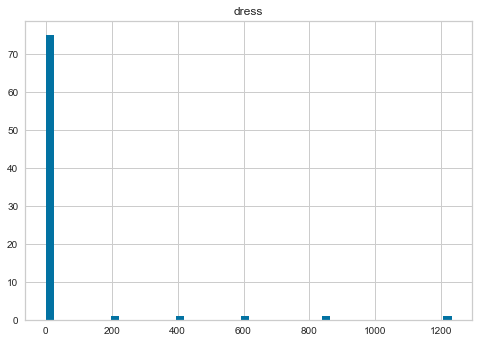

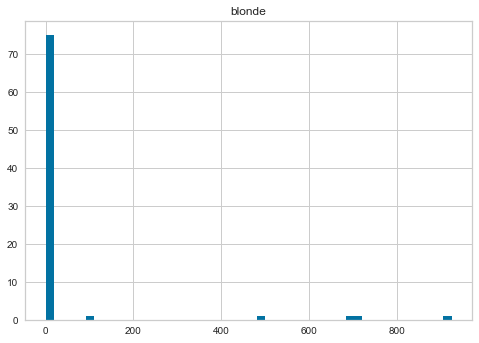

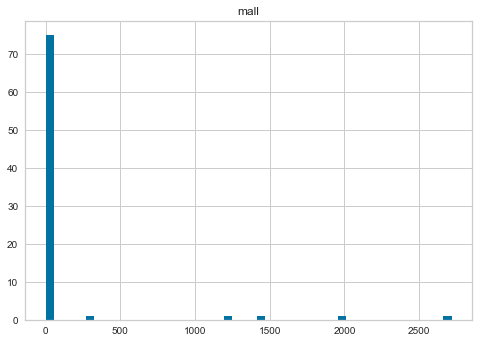

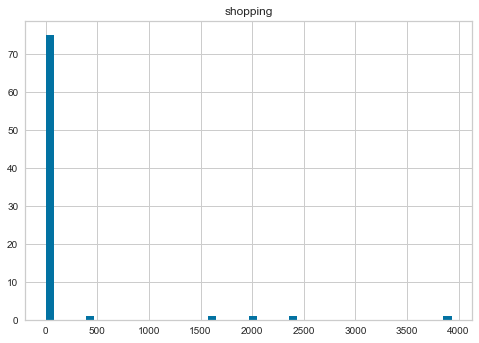

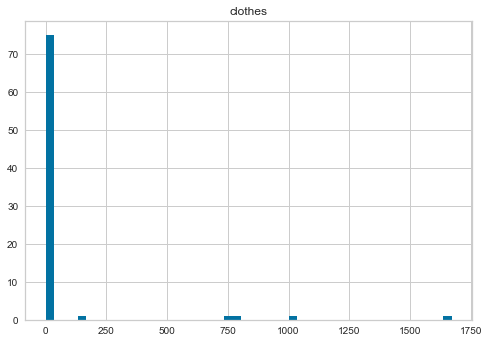

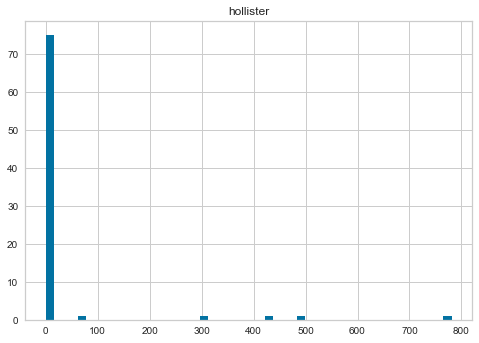

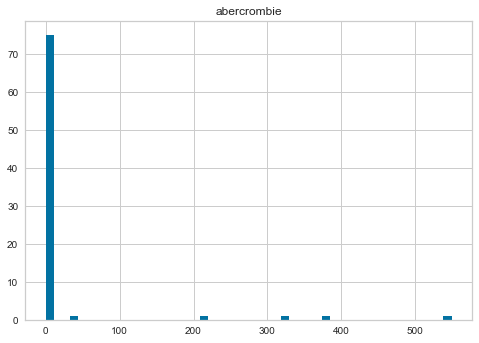

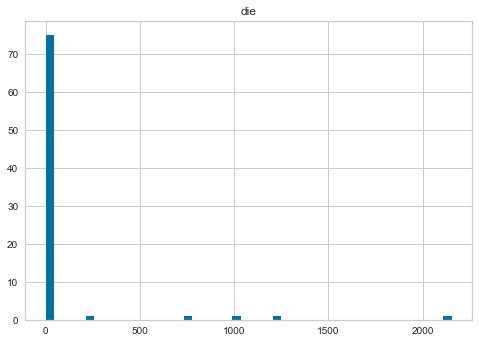

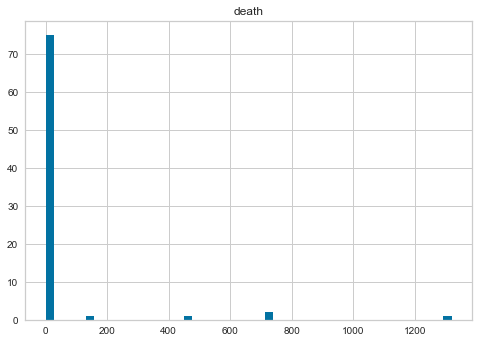

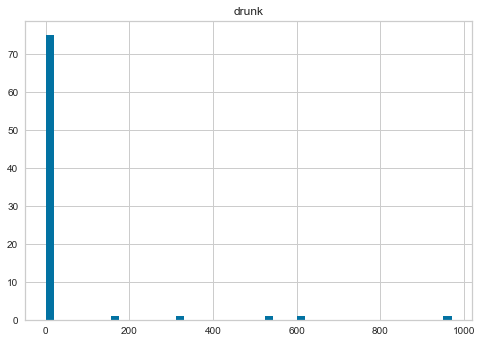

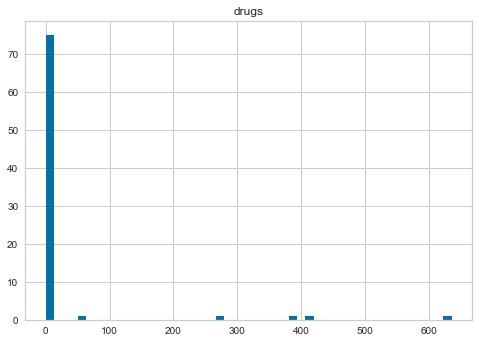

In [32]:
datademo = data.groupby('age').sum()

for column in datademo.columns:
    datademo[column].hist(bins=50)
    plt.title(str(column))
    plt.show()

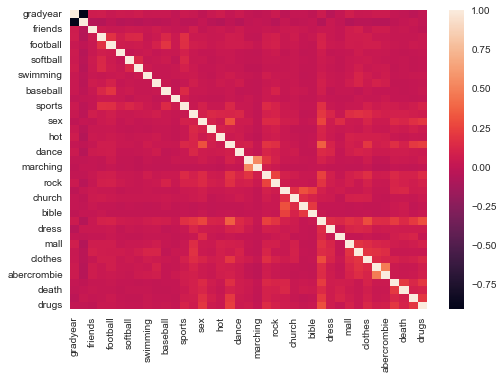

In [58]:
sns.heatmap(df.corr());

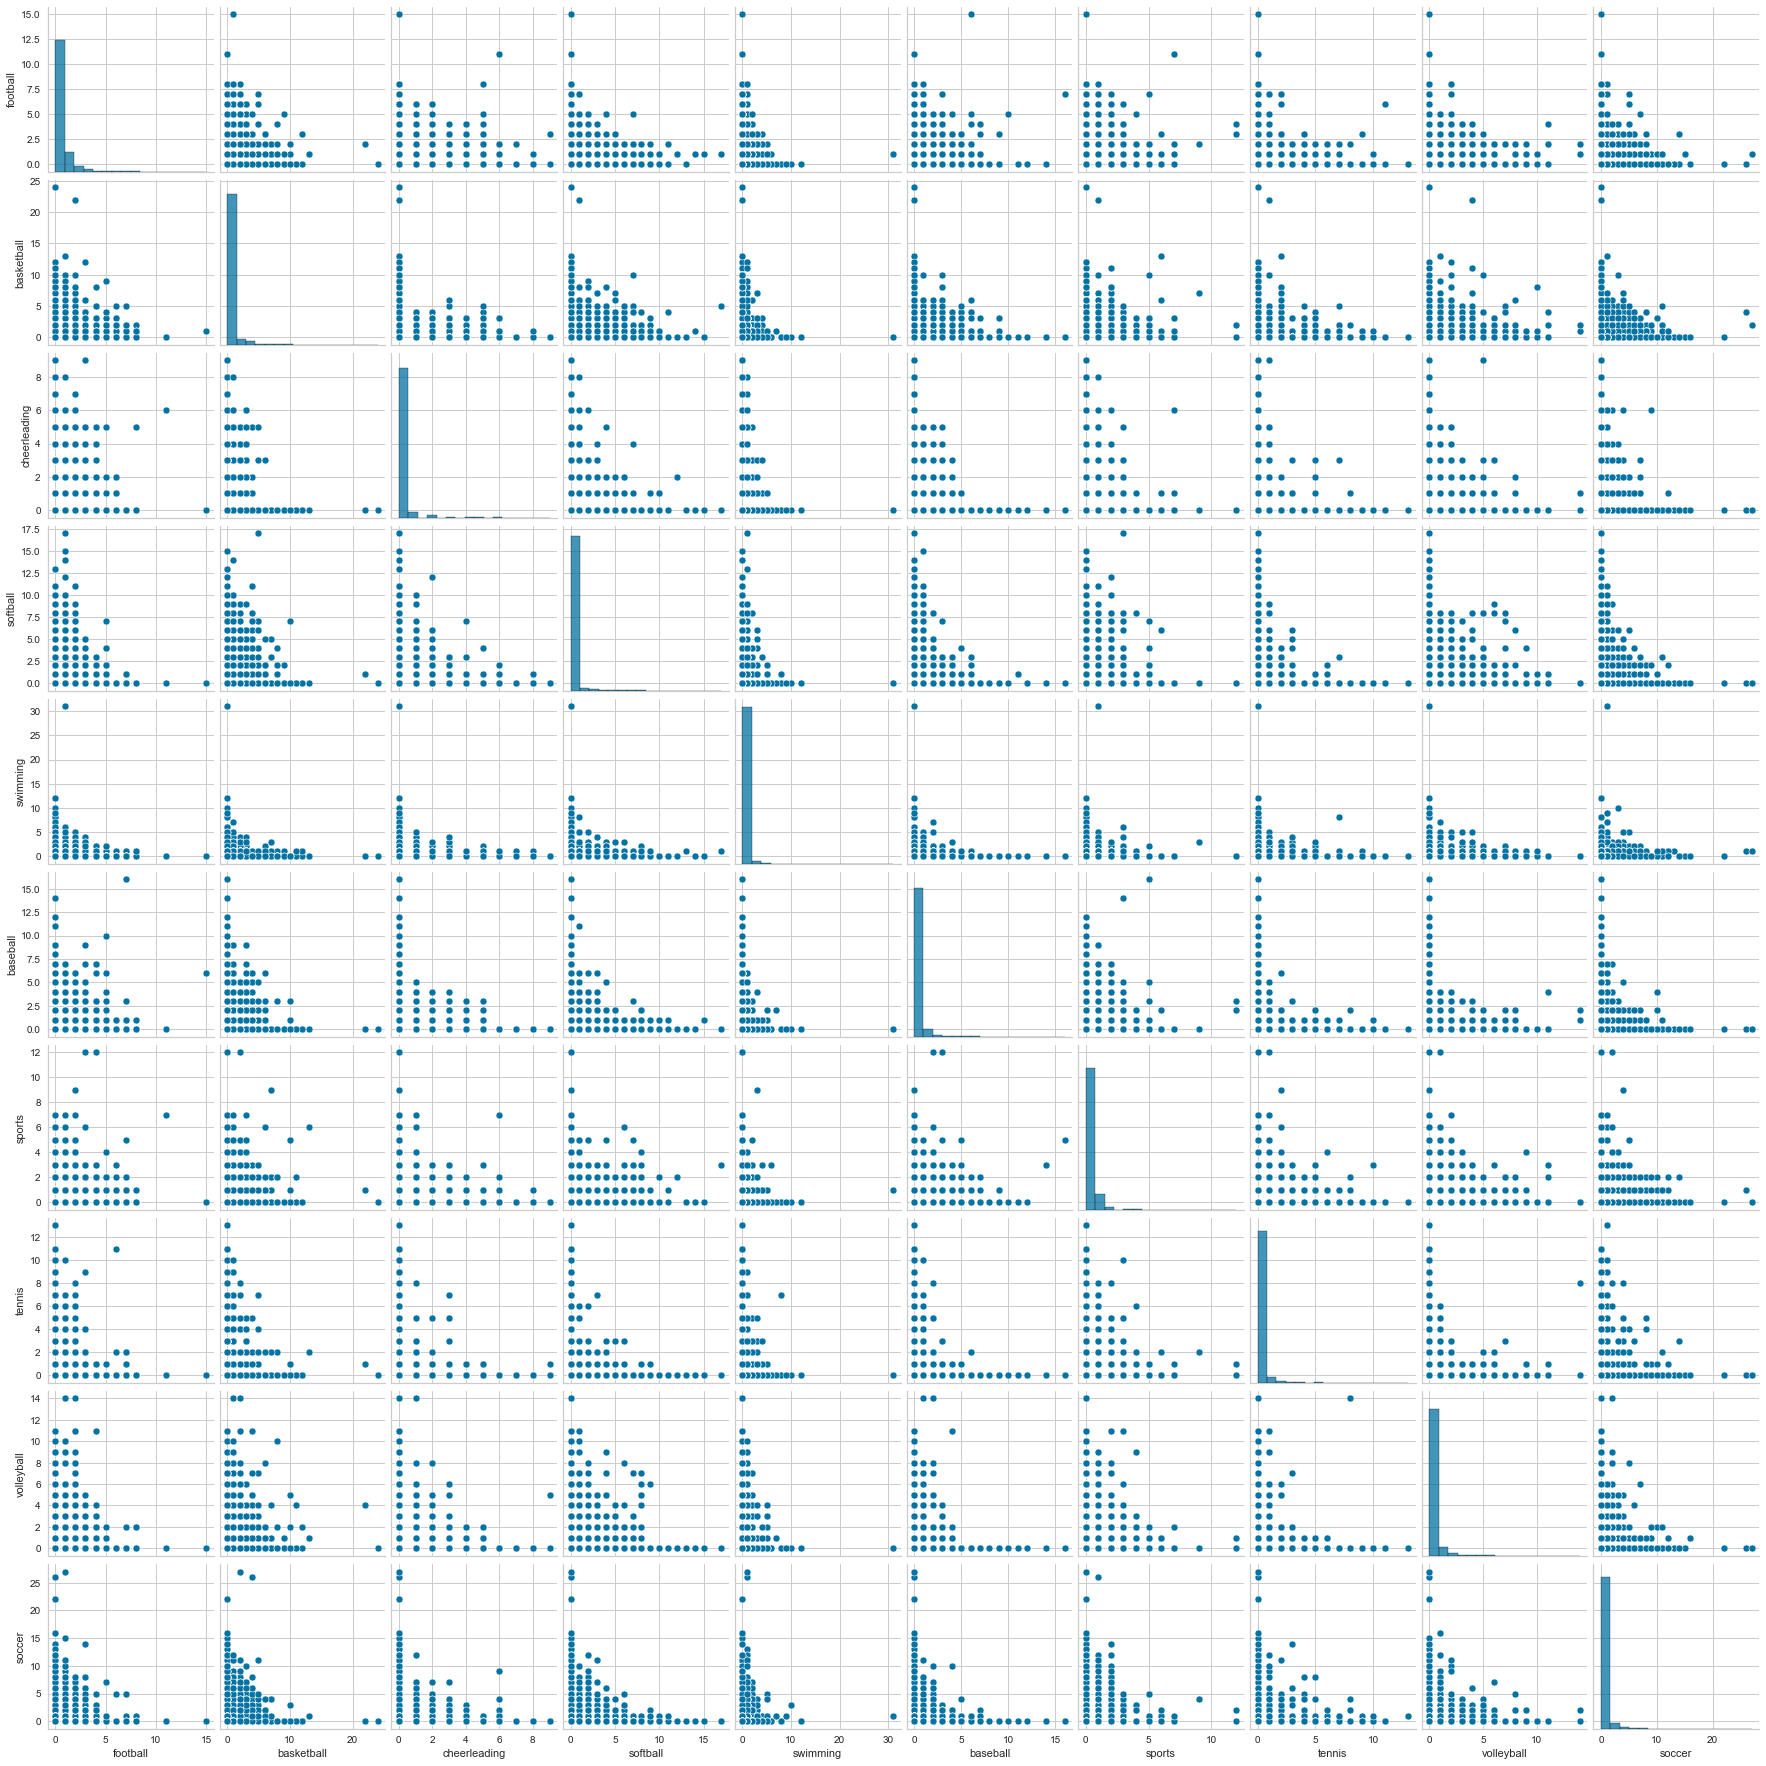

In [59]:
sports = ['football', 'basketball','cheerleading','softball','swimming', 'baseball', 'sports', 'tennis', 'volleyball', 'soccer']
sns.pairplot(df[sports]);

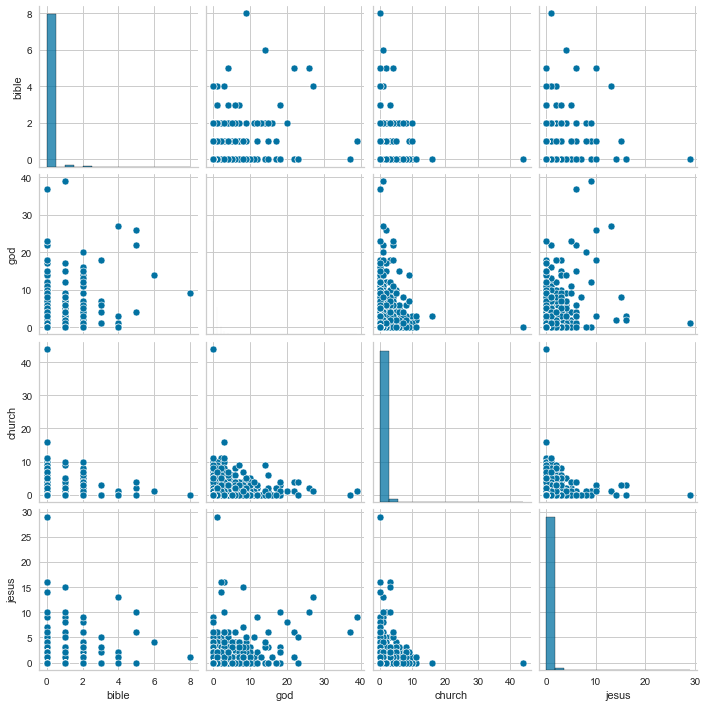

In [60]:
religious = ['bible', 'god','church', 'jesus']
sns.pairplot(df[religious]);

In [61]:
shopping = ['mall', 'shopping', 'clothes','hollister','abercrombie','dress']
music = ['marching','band','dance', 'music','rock']
vice = ['drunk', 'drugs']
sex = ['sex','sexy','kissed','cute', 'hot']
hair = ['hair', 'blonde']
death = ['die', 'death']

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [62]:
#Your code here:
from scipy import stats

def remove_outlier_zcore(df_in, col_name):
    df_in['z_score']=stats.zscore(df_in[col_name])
    df_out = df_in.loc[df_in['z_score'].abs()<=3]
    return df_out.drop(columns = 'z_score')

# function from here: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [63]:
cols = df.columns[4:]
for col in cols:
    # change to 1 if > 0, 0 otherwise
    df[col] = df[col].apply(lambda x: 1 if x > 0 else 0)

df['gender'] = df['gender'].map({'M': 0, 'F': 1})

In [64]:
df_grouped = df.copy()
df_grouped['rel_enc'] = df[religious].any(axis='columns')
df_grouped['sports_enc'] = df[sports].any(axis='columns')
df_grouped['shop_enc'] = df[shopping].any(axis='columns')
df_grouped['music_enc'] = df[music].any(axis='columns')
df_grouped['vice_enc'] = df[vice].any(axis='columns')
df_grouped['sex_enc'] = df[sex].any(axis='columns')
df_grouped['hair_enc'] = df[hair].any(axis='columns')
df_grouped['death_enc'] = df[death].any(axis='columns')

In [65]:
df_grouped.drop(columns = religious + sports + shopping + music + vice + sex + hair + death, inplace = True)
df_grouped.head()

,gradyear,gender,age,friends,rel_enc,sports_enc,shop_enc,music_enc,vice_enc,sex_enc,hair_enc,death_enc
0,2006,0,18.982,7,False,False,False,True,False,False,False,False
1,2006,1,18.801,0,True,True,True,True,False,True,True,False
2,2006,0,18.335,69,False,True,False,True,False,False,False,True
3,2006,1,18.875,0,False,False,False,True,False,True,False,False
6,2006,1,18.930,72,False,False,True,True,False,False,False,False


In [66]:
df_grouped = df_grouped.replace([True, False], [1,0])
df_grouped.head()

,gradyear,gender,age,friends,rel_enc,sports_enc,shop_enc,music_enc,vice_enc,sex_enc,hair_enc,death_enc
0,2006,0,18.982,7,0,0,0,1,0,0,0,0
1,2006,1,18.801,0,1,1,1,1,0,1,1,0
2,2006,0,18.335,69,0,1,0,1,0,0,0,1
3,2006,1,18.875,0,0,0,0,1,0,1,0,0
6,2006,1,18.930,72,0,0,1,1,0,0,0,0


## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

In [ ]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

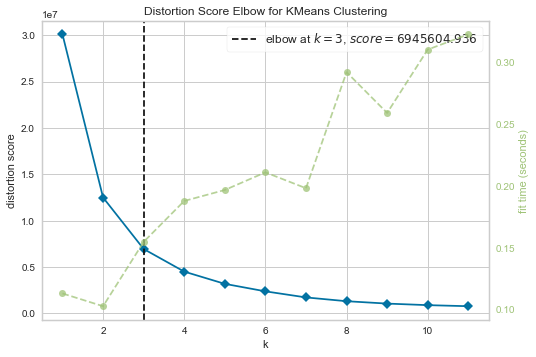

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
#Your code here:

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df)
visualizer.show()

In [69]:
model = KMeans(n_clusters = 3).fit(df)

/var/folders/8p/70rg96_90177mq050h9mr8d80000gn/T/ipykernel_89704/2973772927.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im, ax = ax, orientation='vertical')


Text(0.5, 0, 'age')

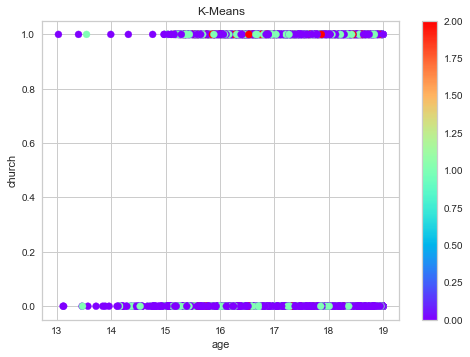

In [70]:
X = df['age']
y = df['church']

fig, ax = plt.subplots(1,1)
im = ax.scatter(X, y, c = model.labels_, cmap = 'rainbow')
ax.set_title('K-Means')
ax.set_ylabel(y.name)
fig.colorbar(im, ax = ax, orientation='vertical')
ax.set_xlabel(X.name)

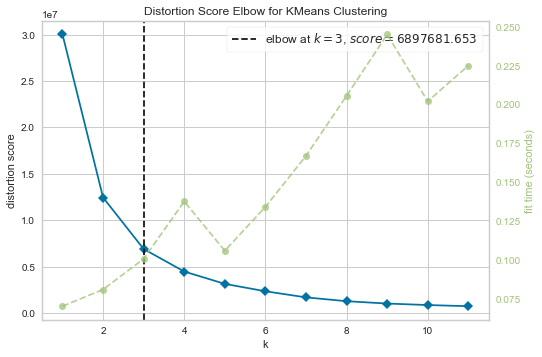

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df_grouped)
visualizer.show() 

In [72]:
model = KMeans(n_clusters = 3).fit(df_grouped)

Text(0.5, 0, 'vice_enc')

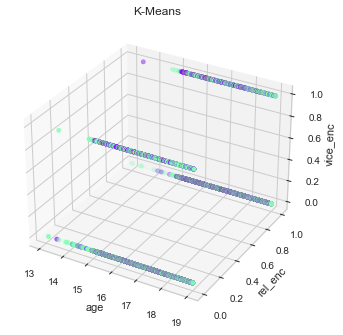

In [73]:
from mpl_toolkits.mplot3d import Axes3D

X = df_grouped['age']
y = df_grouped['rel_enc']
z = df_grouped['vice_enc']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, y, z, c = model.labels_, cmap = 'rainbow')
ax.set_title('K-Means')
ax.set_ylabel(y.name)
ax.set_xlabel(X.name)
ax.set_zlabel(z.name)